# Manipuler des images
Dans cette feuille, vous allez apprendre à effectuer quelques manipulations simples sur les images. Nous avons besoin de charger quelques bibliothèques:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

Une collection d'images est fournie dans le dossier [mini-dataset](mini-dataset/) de ce TP; consultez-la.

Nous allons commencer par nous entrainer sur une image un peu plus riche (source: [wikimedia](https://commons.wikimedia.org/wiki/File:Apple_icon_2.png)). Pour cela, nous la chargeons en précisant le nom du fichier la contenant, puis l'affectons à une variable `img` pour pouvoir la manipuler par la suite:

In [2]:
img = Image.open("apple.png")

Voici cette image:

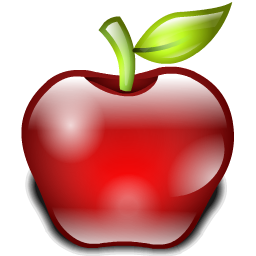

In [3]:
img

Pour l'afficher avec des axes et en repérant mieux les pixels individuels, on peut faire:

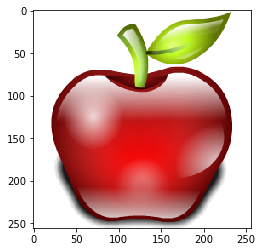

In [4]:
plt.imshow(img)

Comme on peut le lire sur les échelles, cette image est de taille 256 par 256:

In [5]:
img.size

(256, 256)

1. Chargez l'image `mini-dataset/a01.png` et stockez la dans la variable `img2`
3. Affichez la, sans puis avec axes
4. Déterminez sa taille

In [6]:
### BEGIN SOLUTION
img2 = Image.open("mini-dataset/a01.png")
### END SOLUTION

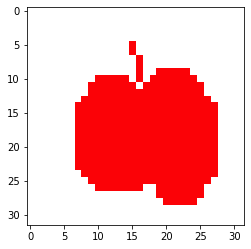

In [7]:
### BEGIN SOLUTION
plt.imshow(img2)
### END SOLUTION

In [8]:
### BEGIN SOLUTION
img2.size
### END SOLUTION

(32, 32)

## Images comme tableaux
On souhaite maintenant pouvoir accéder au contenu de l'image pour pouvoir calculer avec? Pour cela, nous allons convertir l'image en un tableau de nombres. En Python, de tels tableaux peuvent être représentés avec `np.array`. Voir la [fiche dédiée sur les tableaux](02-tableaux.ipynb).

Voici le tableau associé à l'image:

In [9]:
M = np.array(img)

En vous référant au cours, combien de lignes, de colonnes et de couches devrait avoir ce tableau? Vérifier avec `shape`.

In [10]:
### BEGIN SOLUTION
M.shape
### END SOLUTION

(256, 256, 4)

Pourquoi quatre couches? Rouge, Vert, Bleu, ... et transparence!

On peut récupérer la couleur d'un pixel à partir de ses coordonnées avec:

In [11]:
M[3,5]

array([255, 255, 255, 255], dtype=uint8)

Déterminer la couleur du pixel en haut à gauche et du pixel du milieu:

In [12]:
### BEGIN SOLUTION
M[0,0]
### END SOLUTION

array([255, 255, 255, 255], dtype=uint8)

In [13]:
### BEGIN SOLUTION
M[128,128]
### END SOLUTION

array([196,  28,  28, 255], dtype=uint8)

Retrouvez les couleurs de l'image à l'aide du composant de choix de couleur ci-dessous (cliquez sur le carré de couleur), et vérifiez la cohérence avec les résultats ci-dessus.

ColorPicker(value='black')

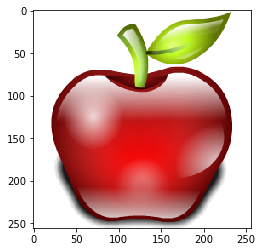

In [14]:
plt.imshow(M)
import ipywidgets
ipywidgets.ColorPicker()

Vous vous êtes peut-être demandé la signification de `dtype=uint8` dans l'affichage des pixels? Les niveaux de couleur sont indiqués par des nombres entre 0 et 255. Ils sont représentés en interne par des entiers (`int`) courts stockés sur 8 bits (`8`), sans signe (`u`). Quelle conséquence en pratique? Faisons un calcul: ici, on va multiplier tous les coefficients par $2$:

In [15]:
pixel = M[128,128]
pixel

array([196,  28,  28, 255], dtype=uint8)

In [16]:
2 * pixel

array([136,  56,  56, 254], dtype=uint8)

Comme vous pouvez le constater, tous les calculs ont eu lieu modulo $256$!

Si on souhaite faire des calculs sur, par exemple, de vrais entiers, on peut le spécifier comme suit:

In [17]:
pixel = np.array( M[128,128], dtype=int)

In [18]:
2 * pixel

array([392,  56,  56, 510])

Pour faire des calculs sur des nombres réèls à virgule, il y a un raccourci pratique; c'est ce que nous utiliserons par la suite:

In [19]:
pixel = M[128,128] * 1.0
pixel

array([196.,  28.,  28., 255.])

In [20]:
2 * pixel

array([392.,  56.,  56., 510.])

## Séparation des couleurs
Nous allons maintenant extraire les trois canaux, rouge, vert, bleu. Pour le canal des rouges, on extrait le sous-tableau à deux dimension de toutes les cases d'indice $(i,j,k)$ avec $k=0$. Notez le `* 1.0` pour travailler en nombres à virgule.

In [21]:
R = M[:,:,0] * 1.0

Regarder le résultat directement n'est pas très informatif:

In [22]:
R

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

Comme souvent, il vaut mieux le *visualiser*.

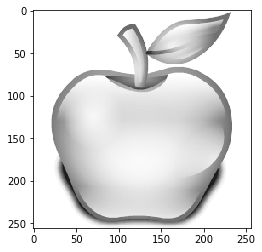

In [23]:
plt.imshow(R, cmap='Greys_r', vmin=0, vmax=255)

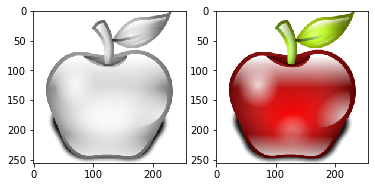

In [24]:
fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(R, cmap='Greys_r', vmin=0, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M)

### Exercice
1. Procédez de même pour visualiser le canal rouge de la deuxième image. Utilisez M2 et R2 comme noms de variables; on réutilisera M et R plus loin. Notez que l'on distingue à peine la pomme (pourquoi?):

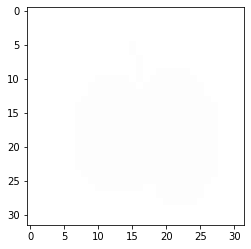

In [25]:
### BEGIN SOLUTION
M2 = np.array(img2)
R2 = M2[:,:,0] * 1.0
plt.imshow(R2, cmap='Greys_r', vmin=0, vmax=255)
### END SOLUTION

2. Comme ci-dessus, affichez l'image originale à côté du résultat et jouez avec les paramètres `vmin` et `vmax` pour mieux le visualiser:

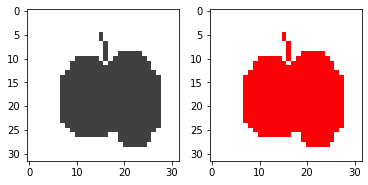

In [26]:
### BEGIN SOLUTION
fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(R2, cmap='Greys_r', vmin=250, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M2)
### END SOLUTION

3. Extraire et afficher de même le canal des verts et des bleus de la première image:

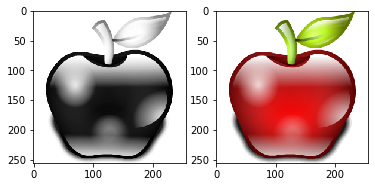

In [27]:
### BEGIN SOLUTION
G = M[:,:,1] * 1.0

fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(G, cmap='Greys_r', vmin=0, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M)
### END SOLUTION

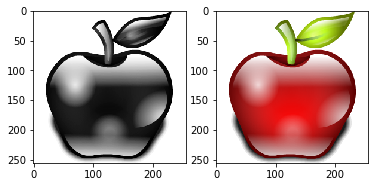

In [28]:
### BEGIN SOLUTION
B = M[:,:,2] * 1.0

fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(B, cmap='Greys_r', vmin=0, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M)
### END SOLUTION

Il est maintenant facile de faire de l'arithmétique sur tous les pixels. Par exemple la somme des intensités  en vert et rouge s'écrit:

In [29]:
G + R

array([[510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       ...,
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.]])

### Exercice
1. Calculer et visualizer la luminosité de tous les pixels de l'image, la *luminosité* d'un pixel $(r,g,b)$ étant définie comme la moyenne $v=\frac{r+g+b}{3}$:

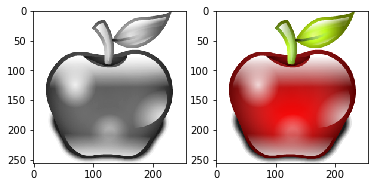

In [30]:
### BEGIN SOLUTION
V = (R+G+B)/3

fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(V, cmap='Greys_r', vmin=0, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M)
### END SOLUTION

2. De même, calculer et visualiser la rougeur de tous les pixels, la *rougeur* d'un pixel $(r,g,b)$ étant définie par $d=r - \frac{g+b}{2}$:

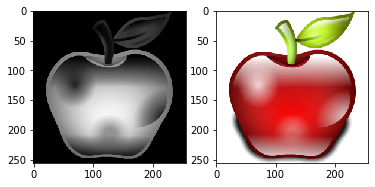

In [31]:
### BEGIN SOLUTION
D = R - (G+B)/2

fig = plt.figure() 
subplot = fig.add_subplot(1,2,1)
subplot.imshow(D, cmap='Greys_r', vmin=0, vmax=255)
subplot = fig.add_subplot(1,2,2)
subplot.imshow(M)
### END SOLUTION

3. Pourquoi avoir défini la rougeur de cette manière?

## Extraction de la caractéristique «rougeur»
On souhaite extraire de l'image une caractéristique se résumant à un seul nombre.
### Exercice
Calculer la rougeur moyenne des pixels de l'image. Attention: on ne veut pas tenir compte des pixels du fond.<br>
**Indication:** si S et T sont des tableaux, `S[T!=10]` sélectionne les cases de `S` où `T` ne vaut pas 10. 

In [32]:
### BEGIN SOLUTION
redness = np.mean(D[V!=255])
redness
### END SOLUTION

95.92190332711999

## Extraction de la caractéristique «élongation»

L'objectif maintenant est d'extraire la caractéristique «élongation» d'une image de fruit. Notre pomme étant peu élongée, on va travailler sur une banane:

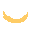

In [33]:
img3 = Image.open("mini-dataset/b01.png")
img3

Pour déterminer l'élongation de la banane, il faut d'abord déterminer sa hauteur. De manière équivalente, on peut compter le nombre de lignes entièrement blanches (on utilise que la banane est connexe).

### Exercice
1. Calculer la luminosité `V3` des pixels de l'image comme précédement

In [34]:
### BEGIN SOLUTION
M3 = np.array(img3)
R3 = M3[:,:,0] * 1.0
G3 = M3[:,:,1] * 1.0
B3 = M3[:,:,2] * 1.0
V3 = (R3 + G3 + B3) / 3
### END SOLUTION

2. Calculer le tableau `minHorizontal` contenant la valeur minimale de chaque ligne.<br>
    Indication: la fonction `min` a la même interface que la fonction `mean` de la fiche sur les tableaux.

In [35]:
### BEGIN SOLUTION
minHorizontal = V3.min(axis=1)
### END SOLUTION
minHorizontal

array([255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 186.66666667,
       186.66666667, 186.66666667, 186.66666667, 186.66666667,
       186.66666667, 186.66666667, 186.66666667, 186.66666667,
       186.66666667, 186.66666667, 186.66666667, 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ])

3. Extraire les valeurs < 255 de `minHorizontal`, et les compter; stocker le résultat dans une variable `height`.<br>
   Indications: inspirez vous de l'exercice précédent, et utiliser la fonction `len`.

In [36]:
### BEGIN SOLUTION
height = len(minHorizontal[minHorizontal<255])
height
### END SOLUTION

12

In [37]:
assert height == 12

4. Procéder de même pour déterminer la largeur `width` de la banane, puis calculer l'élongation `elongation`:

In [38]:
### BEGIN SOLUTION
minVertical = V3.min(axis=0)
width = len(minVertical[minVertical<255])
### END SOLUTION
width

25

In [39]:
### BEGIN HIDDEN TEST
assert width == 25
### END HIDDENT TEST

In [40]:
### BEGIN SOLUTION
elongation = width / height
### END SOLUTION
elongation

2.0833333333333335

In [41]:
### BEGIN HIDDEN TEST
assert abs(elongation - 2.08333) < 0.001
### END HIDDEN TEST